In [58]:
# library importation
import pandas as pd
import numpy as np 
import scipy

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#pip install missigno

# plofiling tools
import pandas_profiling
#pip install pandas_profiling

## Dataset description 

In [2]:
# Reading CSV
data = pd.read_csv('aquastat.csv_.gzip', compression = 'gzip')

In [3]:
data.head()

country        region    variable                        variable_full  \
0  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   
1  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   
2  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   
3  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   
4  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   

  time_period  year_measured    value  
0   1958-1962         1962.0  65286.0  
1   1963-1967         1967.0  65286.0  
2   1968-1972         1972.0  65286.0  
3   1973-1977         1977.0  65286.0  
4   1978-1982         1982.0  65286.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143280 entries, 0 to 143279
Data columns (total 7 columns):
country          143280 non-null object
region           143280 non-null object
variable         143280 non-null object
variable_full    143280 non-null object
time_period      143280 non-null object
year_measured    96411 non-null float64
value            96411 non-null float64
dtypes: float64(2), object(5)
memory usage: 7.7+ MB


In [5]:
#Unique variables
variable_list = data.variable.unique().tolist()
variable_total = data.variable.nunique()

In [6]:
print("Total variables: ", variable_total)
variable_list

Total variables:  60


['total_area',
 'arable_land',
 'permanent_crop_area',
 'cultivated_area',
 'percent_cultivated',
 'total_pop',
 'rural_pop',
 'urban_pop',
 'gdp',
 'gdp_per_capita',
 'agg_to_gdp',
 'human_dev_index',
 'gender_inequal_index',
 'percent_undernourished',
 'number_undernourished',
 'avg_annual_rain_depth',
 'avg_annual_rain_vol',
 'national_rainfall_index',
 'surface_water_produced',
 'groundwater_produced',
 'surface_groundwater_overlap',
 'irwr',
 'irwr_per_capita',
 'surface_entering',
 'surface_inflow_submit_no_treaty',
 'surface_inflow_submit_treaty',
 'surface_inflow_secure_treaty',
 'total_flow_border_rivers',
 'accounted_flow_border_rivers',
 'accounted_flow',
 'surface_to_other_countries',
 'surface_outflow_submit_no_treaty',
 'surface_outflow_submit_treaty',
 'surface_outflow_secure_treaty',
 'surface_total_external_renewable',
 'groundwater_entering',
 'groundwater_accounted_inflow',
 'groundwater_to_other_countries',
 'groundwater_accounted_outflow',
 'water_total_external_re

In [7]:
variable_description = data[['variable','variable_full']].drop_duplicates().reset_index(drop=True)
variable_description

variable  \
0                                  total_area   
1                                 arable_land   
2                         permanent_crop_area   
3                             cultivated_area   
4                          percent_cultivated   
5                                   total_pop   
6                                   rural_pop   
7                                   urban_pop   
8                                         gdp   
9                              gdp_per_capita   
10                                 agg_to_gdp   
11                            human_dev_index   
12                       gender_inequal_index   
13                     percent_undernourished   
14                      number_undernourished   
15                      avg_annual_rain_depth   
16                        avg_annual_rain_vol   
17                    national_rainfall_index   
18                     surface_water_produced   
19                       groundwater_produced   
20                surface_groundwater_overlap   
21                                       irwr   
22                            irwr_per_capita   
23                           surface_entering   
24            surface_inflow_submit_no_treaty   
25               surface_inflow_submit_treaty   
26               surface_inflow_secure_treaty   
27                   total_flow_border_rivers   
28               accounted_flow_border_rivers   
29                             accounted_flow   
30                 surface_to_other_countries   
31           surface_outflow_submit_no_treaty   
32              surface_outflow_submit_treaty   
33              surface_outflow_secure_treaty   
34           surface_total_external_renewable   
35                       groundwater_entering   
36               groundwater_accounted_inflow   
37             groundwater_to_other_countries   
38              groundwater_accounted_outflow   
39             water_total_external_renewable   
40                    total_renewable_surface   
41                total_renewable_groundwater   
42                overlap_surface_groundwater   
43                            total_renewable   
44                           dependency_ratio   
45                 total_renewable_per_capita   
46      exploitable_regular_renewable_surface   
47    exploitable_irregular_renewable_surface   
48        exploitable_total_renewable_surface   
49  exploitable_regular_renewable_groundwater   
50                          exploitable_total   
51                    interannual_variability   
52                       seasonal_variability   
53                         total_dam_capacity   
54                    dam_capacity_per_capita   
55                       irrigation_potential   
56                            flood_occurence   
57                  total_pop_access_drinking   
58                  rural_pop_access_drinking   
59                  urban_pop_access_drinking   

                                        variable_full  
0                 Total area of the country (1000 ha)  
1                          Arable land area (1000 ha)  
2                      Permanent crops area (1000 ha)  
3   Cultivated area (arable land + permanent crops...  
4              % of total country area cultivated (%)  
5                       Total population (1000 inhab)  
6                       Rural population (1000 inhab)  
7                       Urban population (1000 inhab)  
8          Gross Domestic Product (GDP) (current US$)  
9                  GDP per capita (current US$/inhab)  
10                Agriculture, value added to GDP (%)  
11    Human Development Index (HDI) [highest = 1] (-)  
12  Gender Inequality Index (GII) [equality = 0; i...  
13  Prevalence of undernourishment (3-year average...  
14  Number of people undernourished (3-year averag...  
15  Long-term average annual precipitation in dept...  
16  Long-term average annual precipitation in volu...  
17            National Rainfall Index (

In [8]:
# countries
countries_list = data.country.unique().tolist()
countries_total = data.country.nunique()

In [9]:
print("number of countries: ", countries_total)
countries_list

number of countries:  199


['Afghanistan',
 'Armenia',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Bhutan',
 'Brunei Darussalam',
 'Cambodia',
 'China',
 "Democratic People's Republic of Korea",
 'Georgia',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Israel',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Lebanon',
 'Malaysia',
 'Maldives',
 'Mongolia',
 'Myanmar',
 'Nepal',
 'Occupied Palestinian Territory',
 'Oman',
 'Pakistan',
 'Papua New Guinea',
 'Philippines',
 'Qatar',
 'Republic of Korea',
 'Saudi Arabia',
 'Singapore',
 'Sri Lanka',
 'Syrian Arab Republic',
 'Tajikistan',
 'Thailand',
 'Timor-Leste',
 'Turkey',
 'Turkmenistan',
 'United Arab Emirates',
 'Uzbekistan',
 'Viet Nam',
 'Yemen',
 'Belize',
 'Costa Rica',
 'El Salvador',
 'Guatemala',
 'Honduras',
 'Nicaragua',
 'Panama',
 'Cuba',
 'Dominican Republic',
 'Haiti',
 'Jamaica',
 'Antigua and Barbuda',
 'Bahamas',
 'Barbados',
 'Dominica',
 'Grenada',
 'Saint Kitts and Ne

In [10]:
# Time period
time_list = data.time_period.unique().tolist()
time_total = data.time_period.nunique()

In [11]:
print("Number of times period: ", time_total)
time_list

Number of times period:  12


['1958-1962',
 '1963-1967',
 '1968-1972',
 '1973-1977',
 '1978-1982',
 '1983-1987',
 '1988-1992',
 '1993-1997',
 '1998-2002',
 '2003-2007',
 '2008-2012',
 '2013-2017']

In [12]:
# check null values at "total_area"
data[data.variable == 'total_area'].value.isnull().sum()

220

## Data Formatting

### 1.Row: Countries, Columns: Variables @ Time Period

In [13]:
time_period_value = '2013-2017'
# Filtering: data.time_period = time_period_value
data_prueba = data[data.time_period == time_period_value]

#Pivoting: index = country, columns = variable, value = value
data_prueba = data_prueba.pivot(index = 'country', columns = 'variable', values = 'value')

data_prueba.columns.name = time_period_value

data_prueba

2013-2017                                  accounted_flow  \
country                                                     
Afghanistan                                        19.000   
Albania                                             3.300   
Algeria                                             0.390   
Andorra                                               NaN   
Angola                                              0.400   
Antigua and Barbuda                                 0.000   
Argentina                                         584.200   
Armenia                                             0.910   
Australia                                           0.000   
Austria                                            22.700   
Azerbaijan                                         26.560   
Bahamas                                             0.000   
Bahrain                                             0.000   
Bangladesh                                       1122.000   
Barbados                                            0.000   
Belarus                                            23.900   
Belgium                                             6.300   
Belize                                              6.474   
Benin                                              16.090   
Bhutan                                              0.000   
Bolivia (Plurinational State of)                  270.500   
Bosnia and Herzegovina                              2.000   
Botswana                                            9.840   
Brazil                                           2986.000   
Brunei Darussalam                                   0.000   
Bulgaria                                            0.300   
Burkina Faso                                        1.000   
Burundi                                             2.476   
Cabo Verde                                          0.000   
Cambodia                                          355.500   
...                                                   ...   
Swaziland                                           1.870   
Sweden                                              3.000   
Switzerland                                        13.100   
Syrian Arab Republic                               17.340   
Tajikistan                                         13.310   
Thailand                                          214.100   
The former Yugoslav Republic of Macedonia           1.000   
Timor-Leste                                         0.000   
Togo                                                3.200   
Tokelau                                             0.000   
Tonga                                               0.000   
Trinidad and Tobago                                 0.000   
Tunisia                                             0.320   
Turkey                                              4.700   
Turkmenistan                                       45.360   
Tuvalu                                              0.000   
Uganda                                             21.100   
Ukraine                                           120.200   
United Arab Emirates                                0.000   
United Kingdom                                      2.000   
United Republic of Tanzania                        12.270   
United States of America                          251.000   
Uruguay                                            80.000   
Uzbekistan                                         65.650   
Vanuatu                                             0.000   
Venezuela (Bolivarian Republic of)                520.000   
Viet Nam                                          524.700   
Yemen                                               0.000   
Zambia                                             24.600   
Zimbabwe                                            7.740   

2013-2017                                  accounted_flow_border_rivers  \
country                                                                   
Afghan

In [14]:
def time_table(dataframe, time_period):
    dataframe = dataframe[dataframe.time_period == time_period]
    dataframe = dataframe.pivot(index = 'country', columns = 'variable', values = 'value')
    dataframe.columns.name = time_period
    return dataframe

In [15]:
time_table(data, '2013-2017').head()

2013-2017    accounted_flow  accounted_flow_border_rivers  agg_to_gdp  \
country                                                                 
Afghanistan           19.00                           9.0     22.6000   
Albania                3.30                           0.0     22.0500   
Algeria                0.39                           0.0     13.0500   
Andorra                 NaN                           NaN      0.5239   
Angola                 0.40                           0.0         NaN   

2013-2017    arable_land  avg_annual_rain_depth  avg_annual_rain_vol  \
country                                                                
Afghanistan       7771.0                  327.0             213.5000   
Albania            615.6                 1485.0              42.6900   
Algeria           7469.0                   89.0             212.0000   
Andorra              2.8                    NaN               0.4724   
Angola            4900.0                 1010.0            1259.0000   

2013-2017    cultivated_area  dam_capacity_per_capita  dependency_ratio  \
country                                                                   
Afghanistan           7910.0                    61.76           28.7200   
Albania                696.0                  1391.00           10.9300   
Algeria               8439.0                   209.30            3.5990   
Andorra                  2.8                      NaN               NaN   
Angola                5190.0                   377.50            0.2695   

2013-2017    exploitable_irregular_renewable_surface  \
country                                                
Afghanistan                                      NaN   
Albania                                          NaN   
Algeria                                          NaN   
Andorra                                          NaN   
Angola                                           NaN   

2013-2017                 ...                total_flow_border_rivers  \
country                   ...                                           
Afghanistan               ...                                    33.4   
Albania                   ...                                     0.0   
Algeria                   ...                                     0.0   
Andorra                   ...                                     NaN   
Angola                    ...                                     0.0   

2013-2017    total_pop  total_pop_access_drinking  total_renewable  \
country                                                              
Afghanistan   32527.00                       55.3          65.3300   
Albania        2897.00                       95.1          30.2000   
Algeria       39667.00                       83.6          11.6700   
Andorra          70.47                      100.0           0.3156   
Angola        25022.00                       49.0         148.4000   

2013-2017    total_renewable_groundwater  total_renewable_per_capita  \
country                                                                
Afghanistan                       10.650                      2008.0   
Albania                            6.200                     10425.0   
Algeria                            1.517                       294.2   
Andorra                              NaN                      4479.0   
Angola                            58.000                      5931.0   

2013-2017    total_renewable_surface  urban_pop  urban_pop_access_drinking  \
country                                                                      
Afghanistan                    55.68     8547.0                       78.2   
Albania                        26.35     1835.0                       94.9   
Algeria                        10.15    28739.0                       84.3   
Andorra                          NaN       68.9                      100.0   
Angola                        145.40    10052.0                       75.4   

2013-2017

## 2.Row: Variables, Columns: Time_period @ country

In [16]:
def country_table(dataframe, country):
    dataframe = dataframe[dataframe.country == country]
    dataframe = dataframe.pivot(index = 'variable', columns = 'time_period',values = 'value')
    dataframe.columns.name = country
    return dataframe
    

In [17]:
country_table(data, 'Mexico').head()

Mexico                        1958-1962  1963-1967  1968-1972  1973-1977  \
variable                                                                   
accounted_flow                    53.32      53.32      53.32      53.32   
accounted_flow_border_rivers       0.00       0.00       0.00       0.00   
agg_to_gdp                          NaN      12.29      11.52      11.16   
arable_land                    19340.00   18930.00   17684.00   17782.00   
avg_annual_rain_depth            758.00     758.00     758.00     758.00   

Mexico                        1978-1982  1983-1987  1988-1992  1993-1997  \
variable                                                                   
accounted_flow                   53.320     53.320     53.320     53.320   
accounted_flow_border_rivers      0.000      0.000      0.000      0.000   
agg_to_gdp                        8.143      9.679      6.684      4.375   
arable_land                   17795.000  19234.000  22429.000  22785.000   
avg_annual_rain_depth           758.000    758.000    758.000    758.000   

Mexico                        1998-2002  2003-2007  2008-2012  2013-2017  
variable                                                                  
accounted_flow                   53.320      53.32     53.320     53.320  
accounted_flow_border_rivers      0.000       0.00      0.000      0.000  
agg_to_gdp                        3.576       3.32      3.521      3.706  
arable_land                   23184.000   23519.00  23150.000  22993.000  
avg_annual_rain_depth           758.000     758.00    758.000    758.000

## 3.Row: Countries, Columns: Time_period  @ variable

In [18]:
def variable_table(dataframe, variable):
    dataframe = dataframe[dataframe.variable == variable]
    dataframe = dataframe.pivot(index = 'country', columns = 'time_period', values = 'value')
    dataframe.columns.name = variable
    return dataframe

In [19]:
variable_table(data, 'agg_to_gdp').head()

agg_to_gdp   1958-1962  1963-1967  1968-1972  1973-1977  1978-1982  1983-1987  \
country                                                                         
Afghanistan        NaN        NaN        NaN        NaN        NaN        NaN   
Albania            NaN        NaN        NaN        NaN      31.70      33.20   
Algeria            NaN      10.33      8.421       8.47       8.39      12.87   
Andorra            NaN        NaN        NaN        NaN        NaN        NaN   
Angola             NaN        NaN        NaN        NaN        NaN      14.20   

agg_to_gdp   1988-1992  1993-1997  1998-2002  2003-2007  2008-2012  2013-2017  
country                                                                        
Afghanistan        NaN        NaN    38.4700    30.6200    24.6000    22.6000  
Albania          51.64     32.700    24.2400    19.8700    21.6600    22.0500  
Algeria          12.13      9.482     9.7660     7.6880     9.3960    13.0500  
Andorra            NaN        NaN     0.3874     0.3757     0.5681     0.5239  
Angola           10.31      9.002     8.1560        NaN        NaN        NaN

## 4.Time series for a given variable and country

In [20]:
def time_series(dataframe, country, variable):
    dataframe = dataframe[(dataframe.variable== variable) & (dataframe.country == country)]
    dataframe = dataframe.dropna()[['year_measured','value']]
    dataframe.year_measured = dataframe.year_measured.astype(int)
    #dataframe.set_index("year_measured", inplace = True)
    dataframe = dataframe.reset_index(drop = True)
    dataframe.columns = ['year_measured',variable]
    return dataframe

In [21]:
time_series(data, 'Mexico', 'agg_to_gdp')

year_measured  agg_to_gdp
0            1967      12.290
1            1972      11.520
2            1977      11.160
3            1982       8.143
4            1987       9.679
5            1992       6.684
6            1997       4.375
7            2002       3.576
8            2007       3.320
9            2012       3.521
10           2015       3.706

## 5.- Map Regions to 'Asia', 'North America', 'South America', 'Oceania'

In [22]:
data.region.unique()

array(['World | Asia',
       'Americas | Central America and Caribbean | Central America',
       'Americas | Central America and Caribbean | Greater Antilles',
       'Americas | Central America and Caribbean | Lesser Antilles and Bahamas',
       'Americas | Northern America | Northern America',
       'Americas | Northern America | Mexico',
       'Americas | Southern America | Guyana',
       'Americas | Southern America | Andean',
       'Americas | Southern America | Brazil',
       'Americas | Southern America | Southern America', 'World | Africa',
       'World | Europe', 'World | Oceania'], dtype=object)

## Missing Data

In [23]:
recent = time_table(data, '2013-2017')

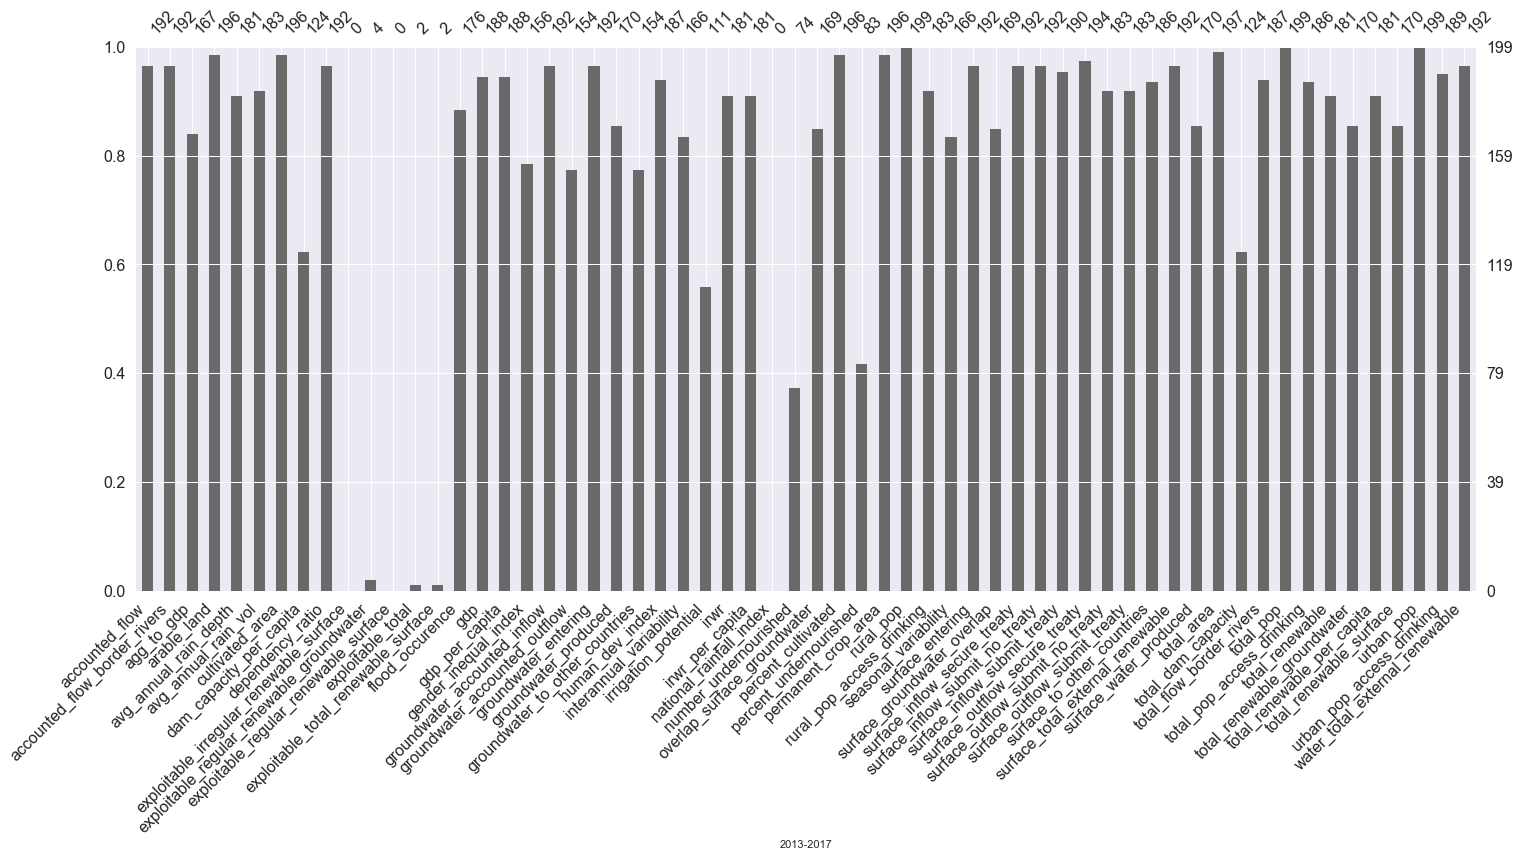

In [25]:
msno.bar(recent, labels = True)

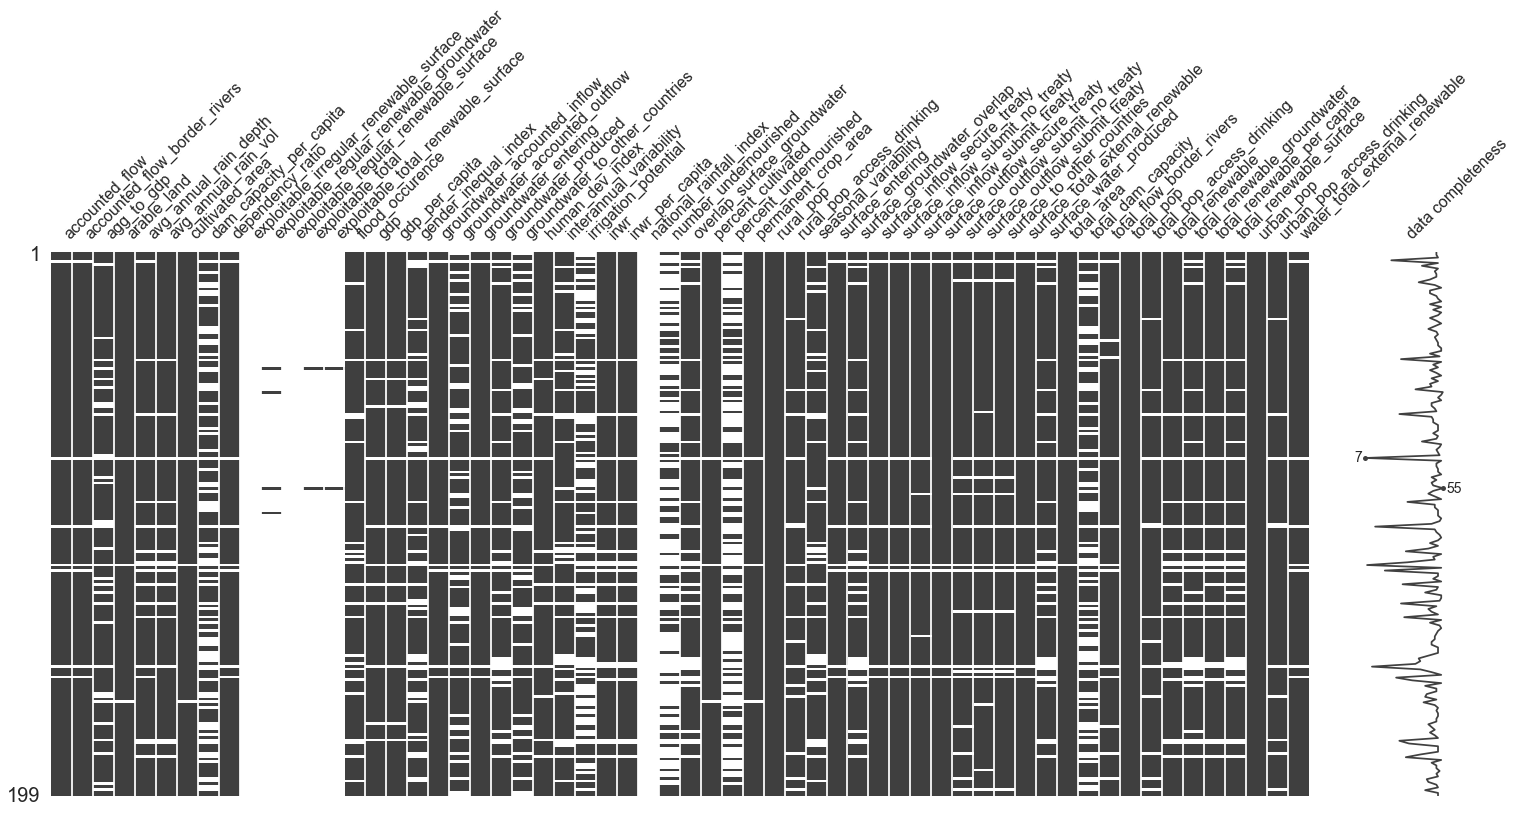

In [26]:
msno.matrix(recent, labels = True)

In [28]:
explotaitable_total_table = variable_table(data, 'exploitable_total')
explotaitable_total_table.head()

exploitable_total  1958-1962  1963-1967  1968-1972  1973-1977  1978-1982  \
country                                                                    
Afghanistan              NaN        NaN        NaN        NaN        NaN   
Albania                 13.0       13.0       13.0       13.0       13.0   
Algeria                  7.9        7.9        7.9        7.9        7.9   
Andorra                  NaN        NaN        NaN        NaN        NaN   
Angola                   NaN        NaN        NaN        NaN        NaN   

exploitable_total  1983-1987  1988-1992  1993-1997  1998-2002  2003-2007  \
country                                                                    
Afghanistan              NaN        NaN        NaN        NaN        NaN   
Albania                 13.0       13.0       13.0       13.0       13.0   
Algeria                  7.9        7.9        7.9        7.9        7.9   
Andorra                  NaN        NaN        NaN        NaN        NaN   
Angola                   NaN        NaN        NaN        NaN        NaN   

exploitable_total  2008-2012  2013-2017  
country                                  
Afghanistan              NaN        NaN  
Albania                 13.0        NaN  
Algeria                  7.9        NaN  
Andorra                  NaN        NaN  
Angola                   NaN        NaN

Text(0, 0.5, 'Country')

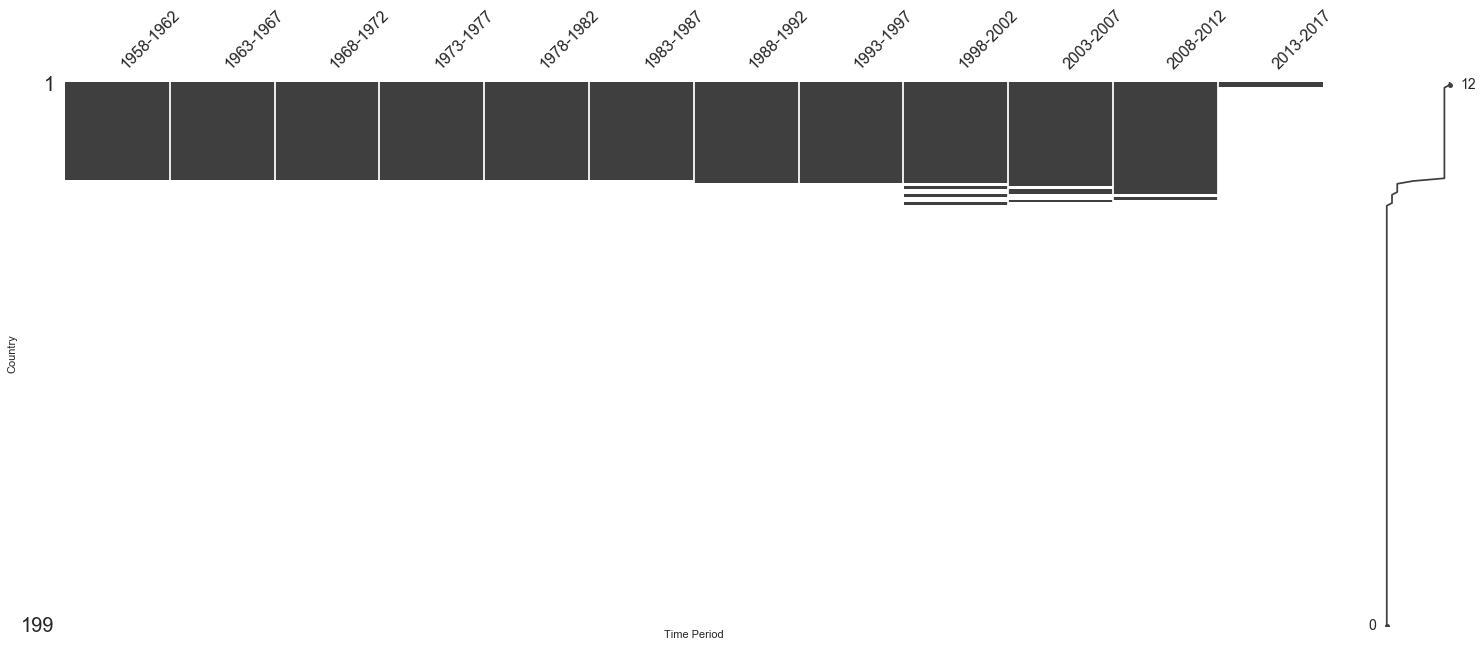

In [30]:
msno.matrix(explotaitable_total_table, sort = "descending")
plt.xlabel("Time Period")
plt.ylabel("Country")

In [31]:
national_total_table = variable_table(data, 'national_rainfall_index')
national_total_table.head()

national_rainfall_index  1958-1962  1963-1967  1968-1972  1973-1977  \
country                                                               
Afghanistan                    NaN      307.0      276.2      279.7   
Albania                        NaN     1312.0     1343.0     1344.0   
Algeria                        NaN      288.8      311.9      289.8   
Andorra                        NaN        NaN        NaN        NaN   
Angola                         NaN     1114.0     1163.0     1149.0   

national_rainfall_index  1978-1982  1983-1987  1988-1992  1993-1997  \
country                                                               
Afghanistan                  322.3      267.4      336.9      297.0   
Albania                     1326.0     1062.0      839.2     1053.0   
Algeria                      325.7      288.3      302.3      258.9   
Andorra                        NaN        NaN        NaN        NaN   
Angola                      1024.0     1110.0     1122.0     1080.0   

national_rainfall_index  1998-2002  2003-2007  2008-2012  2013-2017  
country                                                              
Afghanistan                  185.0        NaN        NaN        NaN  
Albania                     1136.0        NaN        NaN        NaN  
Algeria                      241.5        NaN        NaN        NaN  
Andorra                        NaN        NaN        NaN        NaN  
Angola                      1137.0        NaN        NaN        NaN

Text(0, 0.5, 'Country')

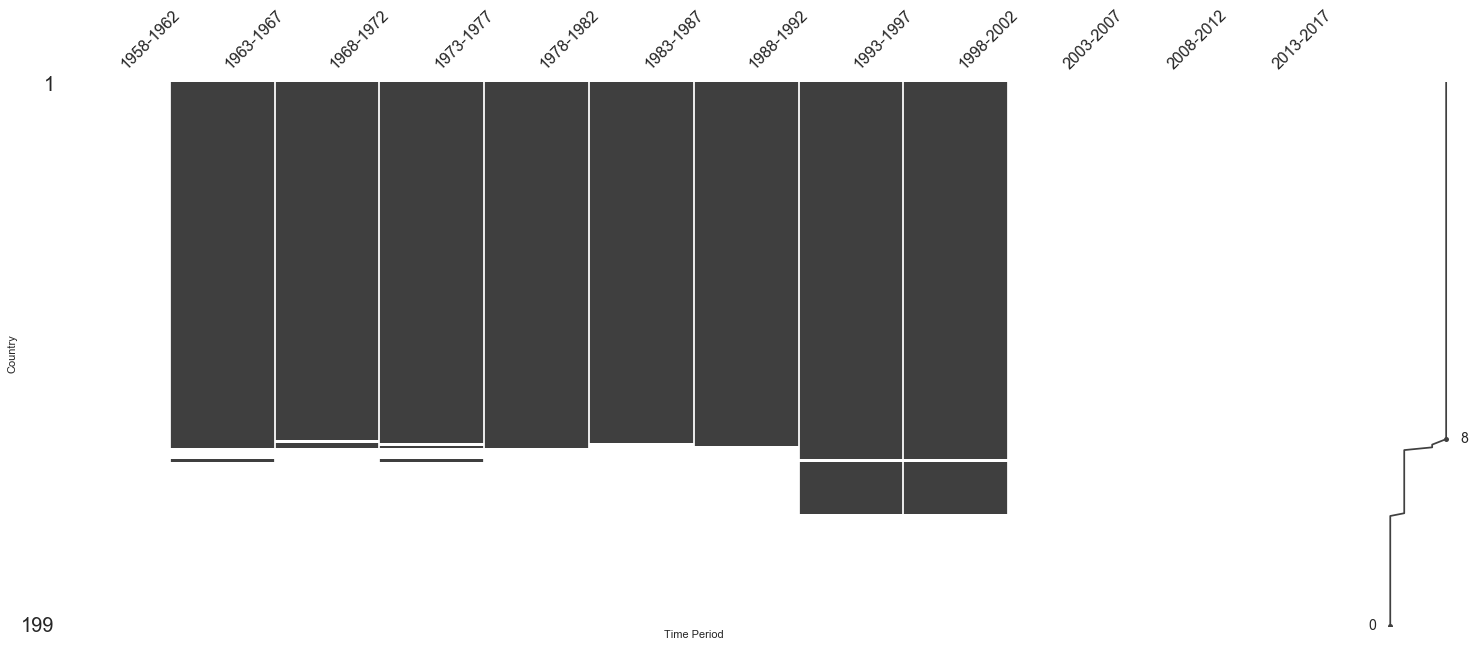

In [33]:
msno.matrix(national_total_table, sort = 'descending')
plt.xlabel("Time Period")
plt.ylabel("Country")

## Eliminating "exploitable variables" and "national rainfall index"

In [38]:
data.groupby(['time_period','variable']).value.count()

time_period  variable                                 
1958-1962    accounted_flow                               167
             accounted_flow_border_rivers                 167
             agg_to_gdp                                    38
             arable_land                                  168
             avg_annual_rain_depth                        156
             avg_annual_rain_vol                          157
             cultivated_area                              168
             dam_capacity_per_capita                       84
             dependency_ratio                             166
             exploitable_irregular_renewable_surface       15
             exploitable_regular_renewable_groundwater     48
             exploitable_regular_renewable_surface         22
             exploitable_total                             36
             exploitable_total_renewable_surface           23
             flood_occurence                                0
             gd

In [40]:
variable_times_table = data.groupby(['time_period','variable']).value.count().unstack().T
variable_times_table.head()

time_period                   1958-1962  1963-1967  1968-1972  1973-1977  \
variable                                                                   
accounted_flow                      167        167        167        167   
accounted_flow_border_rivers        167        167        167        167   
agg_to_gdp                           38         59         70         84   
arable_land                         168        168        168        168   
avg_annual_rain_depth               156        156        156        156   

time_period                   1978-1982  1983-1987  1988-1992  1993-1997  \
variable                                                                   
accounted_flow                      167        167        186        190   
accounted_flow_border_rivers        167        167        186        190   
agg_to_gdp                          103        111        139        168   
arable_land                         168        168        187        191   
avg_annual_rain_depth               156        156        175        179   

time_period                   1998-2002  2003-2007  2008-2012  2013-2017  
variable                                                                  
accounted_flow                      190        190        192        192  
accounted_flow_border_rivers        190        190        192        192  
agg_to_gdp                          176        181        176        167  
arable_land                         193        195        196        196  
avg_annual_rain_depth               179        179        181        181

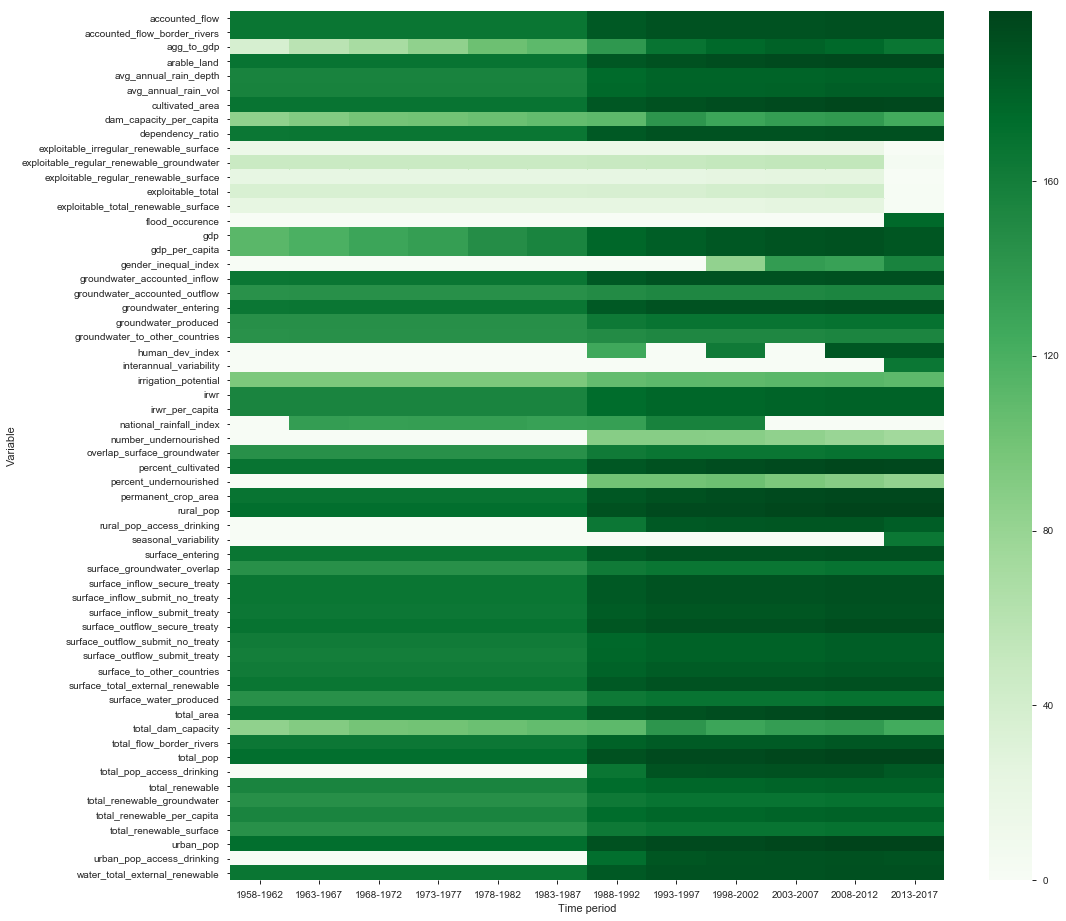

In [44]:
plt.figure(figsize = (16,16))
sns.heatmap(variable_times_table, cmap = "Greens")
plt.xlabel("Time period")
plt.ylabel("Variable")
plt.show()

In [45]:
pandas_profiling.ProfileReport(recent)

## Univariate

In [46]:
recent.head()

2013-2017    accounted_flow  accounted_flow_border_rivers  agg_to_gdp  \
country                                                                 
Afghanistan           19.00                           9.0     22.6000   
Albania                3.30                           0.0     22.0500   
Algeria                0.39                           0.0     13.0500   
Andorra                 NaN                           NaN      0.5239   
Angola                 0.40                           0.0         NaN   

2013-2017    arable_land  avg_annual_rain_depth  avg_annual_rain_vol  \
country                                                                
Afghanistan       7771.0                  327.0             213.5000   
Albania            615.6                 1485.0              42.6900   
Algeria           7469.0                   89.0             212.0000   
Andorra              2.8                    NaN               0.4724   
Angola            4900.0                 1010.0            1259.0000   

2013-2017    cultivated_area  dam_capacity_per_capita  dependency_ratio  \
country                                                                   
Afghanistan           7910.0                    61.76           28.7200   
Albania                696.0                  1391.00           10.9300   
Algeria               8439.0                   209.30            3.5990   
Andorra                  2.8                      NaN               NaN   
Angola                5190.0                   377.50            0.2695   

2013-2017    exploitable_irregular_renewable_surface  \
country                                                
Afghanistan                                      NaN   
Albania                                          NaN   
Algeria                                          NaN   
Andorra                                          NaN   
Angola                                           NaN   

2013-2017                 ...                total_flow_border_rivers  \
country                   ...                                           
Afghanistan               ...                                    33.4   
Albania                   ...                                     0.0   
Algeria                   ...                                     0.0   
Andorra                   ...                                     NaN   
Angola                    ...                                     0.0   

2013-2017    total_pop  total_pop_access_drinking  total_renewable  \
country                                                              
Afghanistan   32527.00                       55.3          65.3300   
Albania        2897.00                       95.1          30.2000   
Algeria       39667.00                       83.6          11.6700   
Andorra          70.47                      100.0           0.3156   
Angola        25022.00                       49.0         148.4000   

2013-2017    total_renewable_groundwater  total_renewable_per_capita  \
country                                                                
Afghanistan                       10.650                      2008.0   
Albania                            6.200                     10425.0   
Algeria                            1.517                       294.2   
Andorra                              NaN                      4479.0   
Angola                            58.000                      5931.0   

2013-2017    total_renewable_surface  urban_pop  urban_pop_access_drinking  \
country                                                                      
Afghanistan                    55.68     8547.0                       78.2   
Albania                        26.35     1835.0                       94.9   
Algeria                        10.15    28739.0                       84.3   
Andorra                          NaN       68.9                      100.0   
Angola                        145.40    10052.0                       75.4   

2013-2017

In [47]:
# total_pop, urban_pop and rural_pop


In [59]:
recent_pop = recent[['total_pop','urban_pop','rural_pop']]

In [60]:
recent_pop.describe().astype(int).T

count   mean     std  min   25%   50%    75%      max
2013-2017                                                       
total_pop    199  36890  140720    0  1368  7595  25088  1407306
urban_pop    199  19849   69681    0   822  3967  11656   805387
rural_pop    199  17040   77461  -98   500  2404  10677   891112

In [61]:
recent_pop.sort_values('rural_pop').head()

2013-2017  total_pop  urban_pop  rural_pop
country                                   
Qatar        2235.00    2333.00     -98.00
Singapore    5604.00    5619.00     -15.00
Monaco         37.73      38.32      -0.59
Holy See        0.80       0.80       0.00
Nauru          10.22      10.12       0.10

In [63]:
recent_pop.apply(scipy.stats.skew)

2013-2017
total_pop    8.519379
urban_pop    8.545690
rural_pop    9.490029
dtype: float64

In [62]:
recent_pop.apply(scipy.stats.kurtosis)

2013-2017
total_pop    76.923725
urban_pop    85.499659
rural_pop    95.838930
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C8B07FDA0>,
      dtype=object)

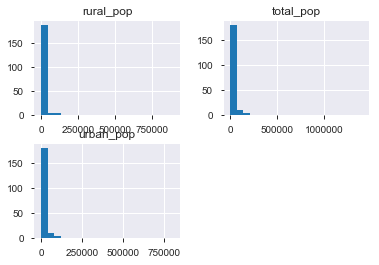

In [66]:
recent_pop.hist(bins = 20)

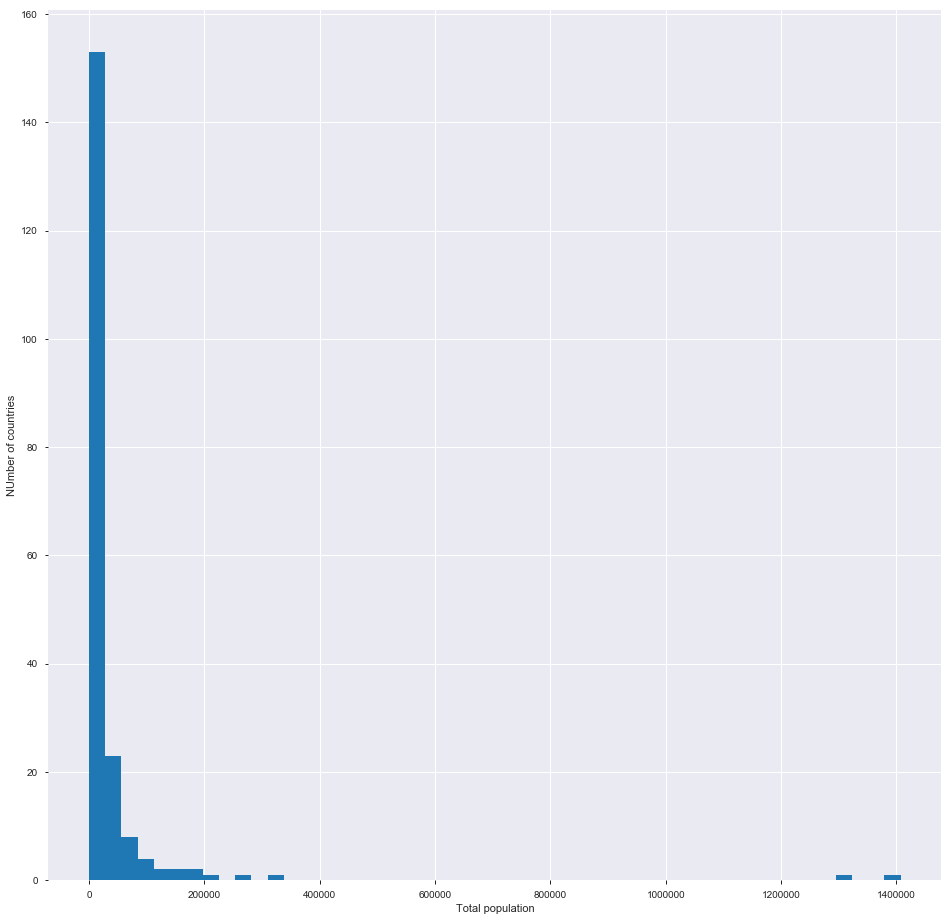

In [70]:
plt.figure(figsize = (16,16))
plt.hist(recent.total_pop, bins = 50)
plt.xlabel("Total population")
plt.ylabel("NUmber of countries")
plt.show()

In [76]:
recent_pop.sort_values('total_pop').tail()

2013-2017                 total_pop  urban_pop  rural_pop
country                                                  
Brazil                     207848.0   174508.0    33340.0
Indonesia                  257564.0   137422.0   120142.0
United States of America   321774.0   265361.0    56413.0
India                     1311051.0   419939.0   891112.0
China                     1407306.0   805387.0   601919.0

In [81]:
total_pop_log = recent[['total_pop']].apply(np.log)

In [82]:
total_pop_log.apply(scipy.stats.skew)

2013-2017
total_pop   -0.899063
dtype: float64

In [83]:
total_pop_log.apply(scipy.stats.kurtosis)

2013-2017
total_pop    1.086877
dtype: float64

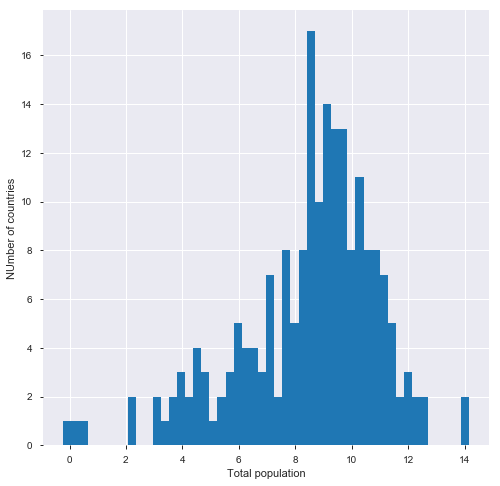

In [86]:
plt.figure(figsize = (8,8))
plt.hist(total_pop_log.values, bins = 50)
plt.xlabel("Total population")
plt.ylabel("NUmber of countries")
plt.show()